# Importing Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import train_test_split
from sklearn import metrics

from warnings import filterwarnings
filterwarnings('ignore')

In [60]:
data = pd.read_csv("CopperData.csv")
categorical_data = pd.read_csv("categorical_one_hot_encoded.csv")

data_shape = data.shape
print("Shape of primary dataframe : {} features for {} datapoints.".format(data_shape[1], data_shape[0]))

cat_shape = categorical_data.shape
print("Shape of categorical dummy features dataframe : {} features for {} datapoints.".format(cat_shape[1], cat_shape[0]))

# Dataframe containing numerical features only
num_cols = data.iloc[:,6:]

# Concatenate numerical columns and dummy variable columns to get processed dataframe
df = pd.concat([num_cols, categorical_data], axis=1)

Shape of primary dataframe : 26 features for 513 datapoints.
Shape of categorical dummy features dataframe : 73 features for 507 datapoints.


In [75]:
transformed_form = data.form.apply(lambda x: x.lower())
transformed_form = transformed_form.replace("\xa0products", "products")
transformed_form = transformed_form.replace("t products", "flat products")
transformed_form = transformed_form.replace("lat products", "flat products").str.strip()
data['transformed_form'] = transformed_form

## Tensile Strength and Thermal Conductivity with **FORM**

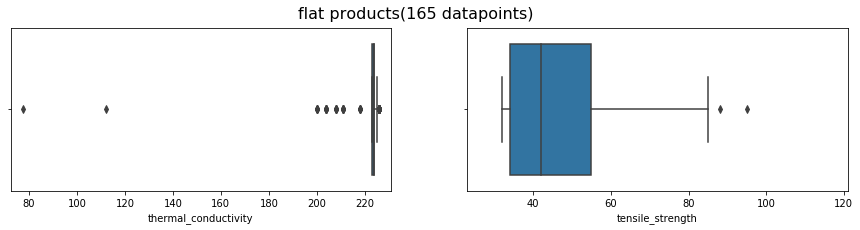

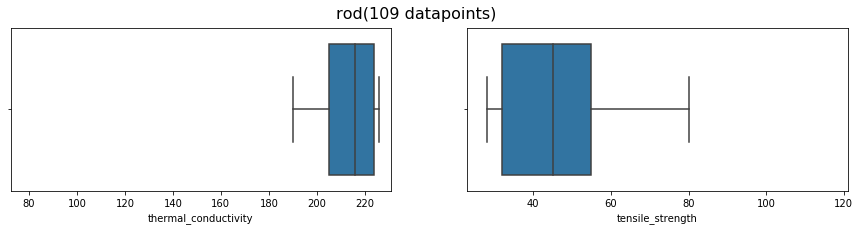

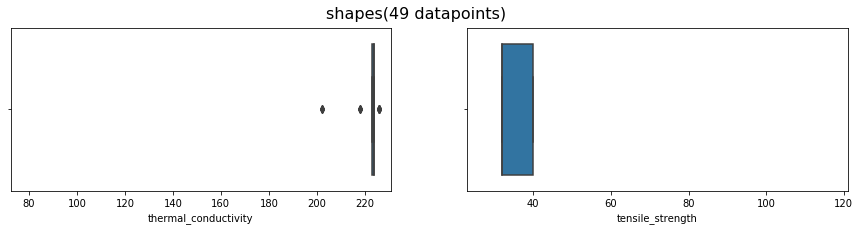

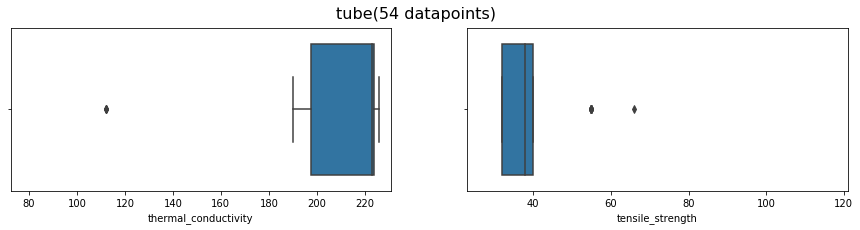

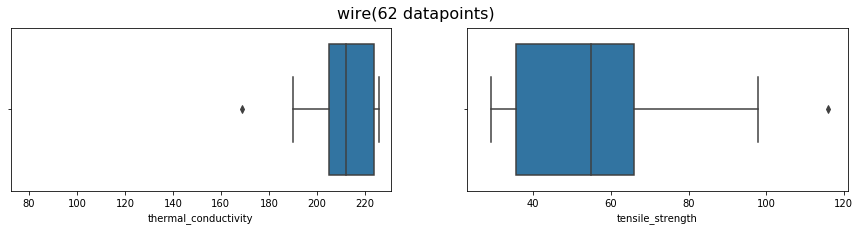

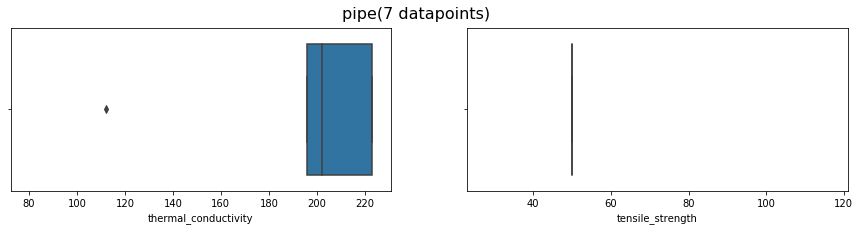

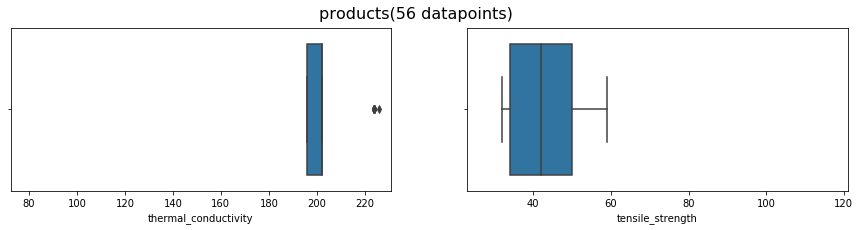

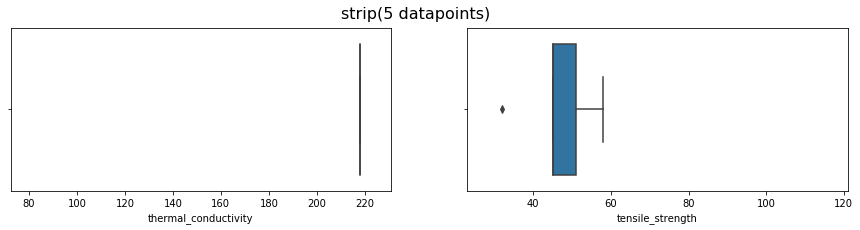

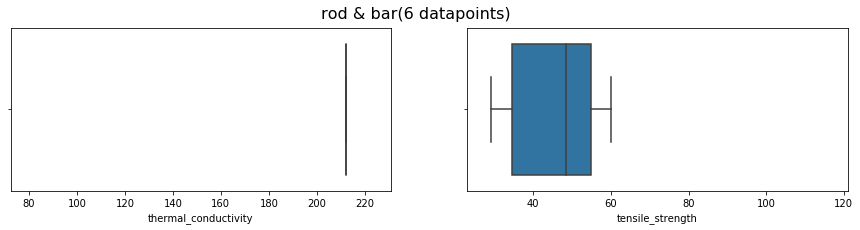

In [94]:
tc_data = data['thermal_conductivity']
ts_data = data['tensile_strength']
for f in data['transformed_form'].unique():
    
    subset = data.loc[data['transformed_form'] == f]
    tc_subset = subset['thermal_conductivity']
    ts_subset = subset['tensile_strength']
    
    fig, ax = plt.subplots(1, 2, figsize=(15,3))
    fig.suptitle(f + "({} datapoints)".format(len(subset)), fontsize=16)
    
    sns.boxplot(tc_subset, ax=ax[0])
    ax[0].set_xlim([tc_data.min()-5, tc_data.max()+5])
    
    sns.boxplot(ts_subset, ax=ax[1])
    ax[1].set_xlim([ts_data.min()-5, ts_data.max()+5])
    
    plt.show()

## Tensile Strength and Thermal Conductivity with **TEMPER**

In [106]:
tc_mean, tc_std = tc_data.mean(), tc_data.std()
ts_mean, ts_std = ts_data.mean(), ts_data.std()

print("Expected value of Thermal Conductivity = {} \u00B1 {} BTU/(h⋅ft⋅°F)".format(round(tc_mean, 3), round(tc_std, 2)))
print("Expected value of Tensile Strength = {} \u00B1 {} N/m^2".format(round(ts_mean, 3), round(ts_std, 2)))

Expected value of Thermal Conductivity = 214.43 ± 16.74 BTU/(h⋅ft⋅°F)
Expected value of Tensile Strength = 45.043 ± 13.53 N/m^2


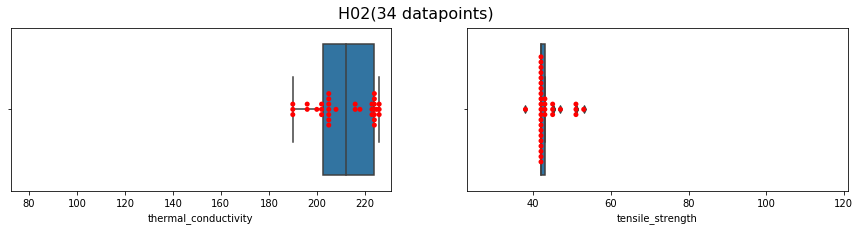

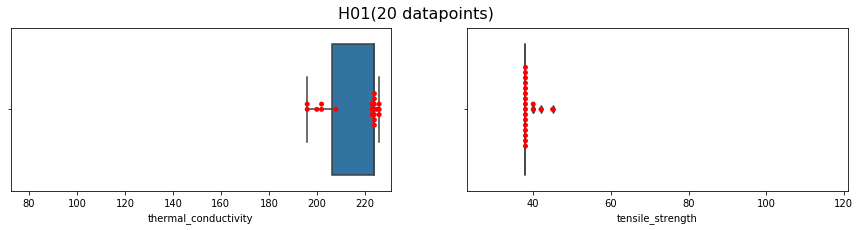

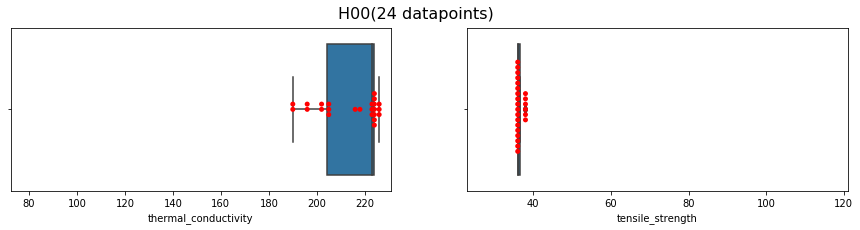

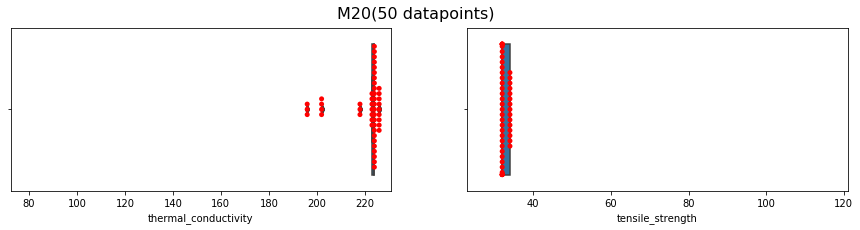

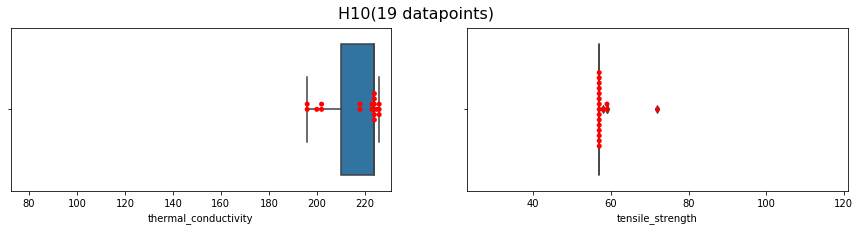

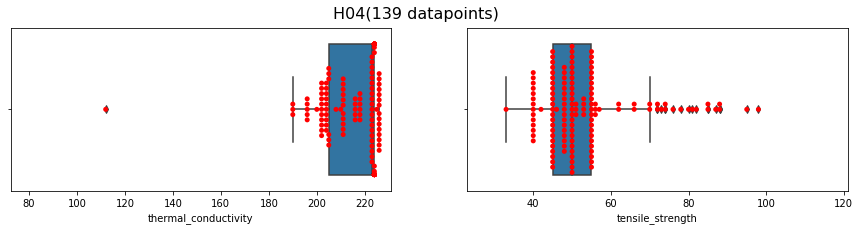

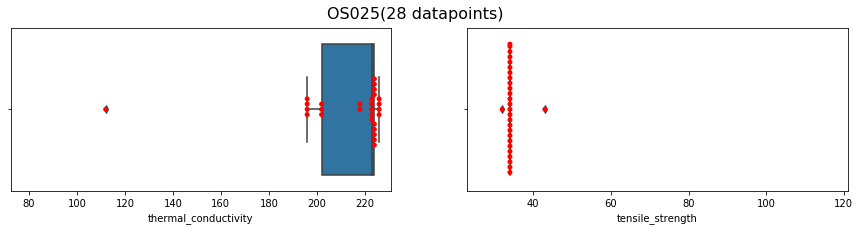

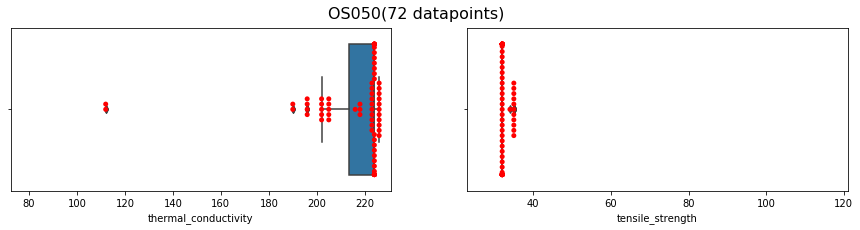

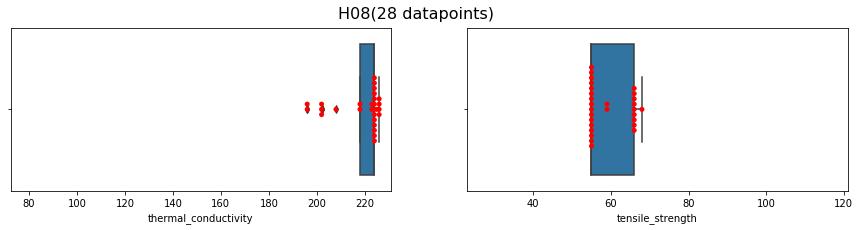

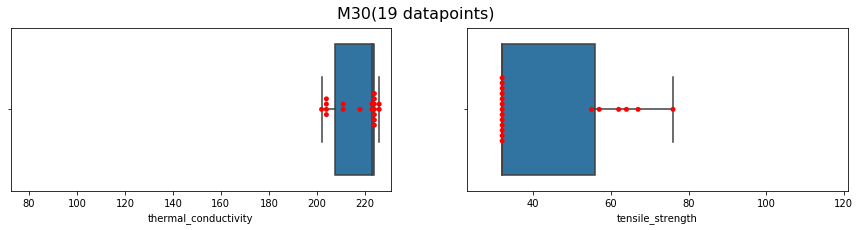

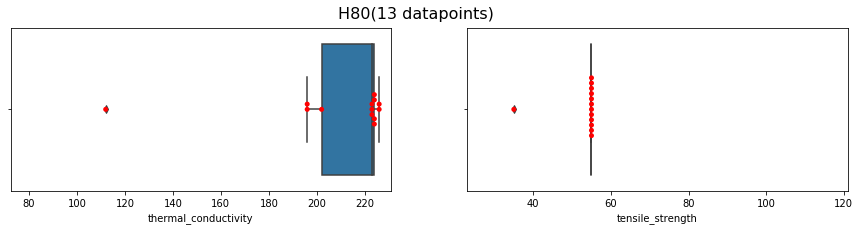

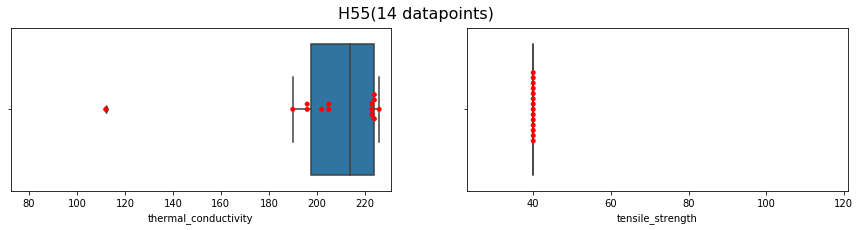

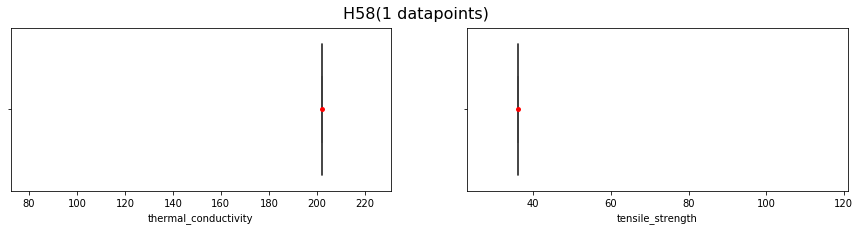

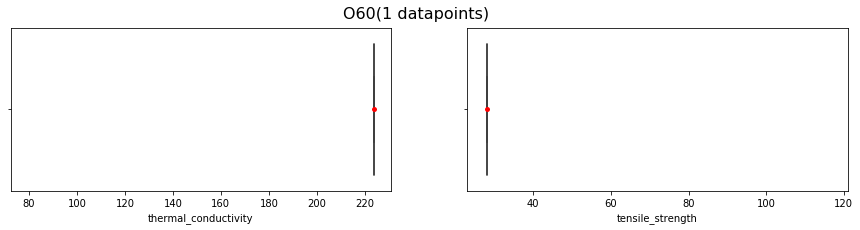

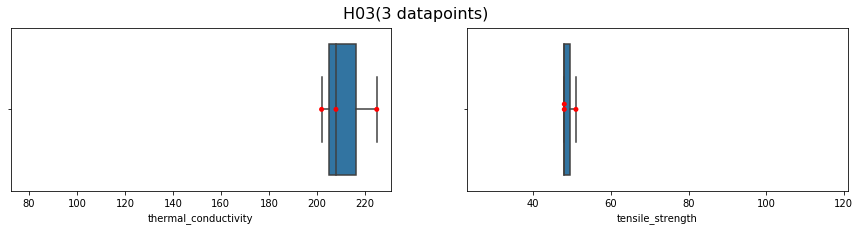

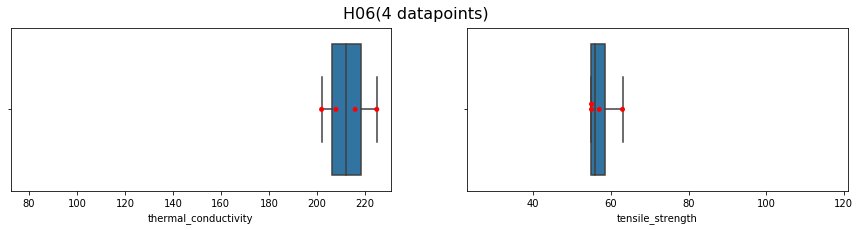

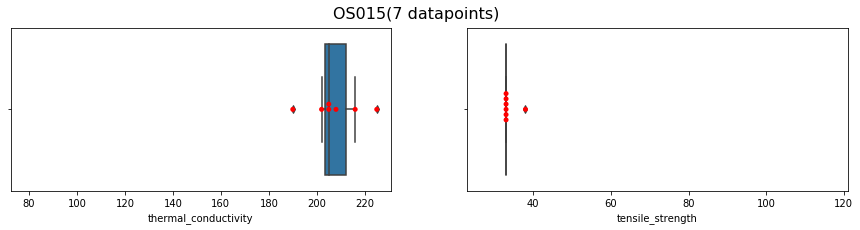

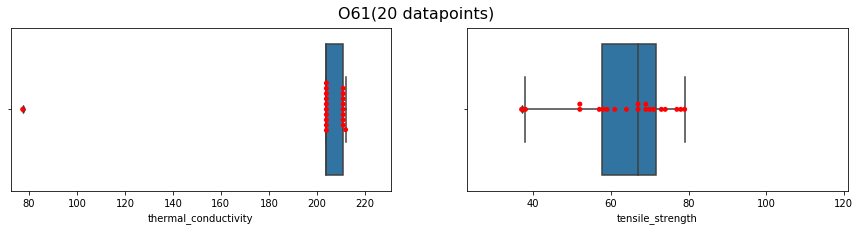

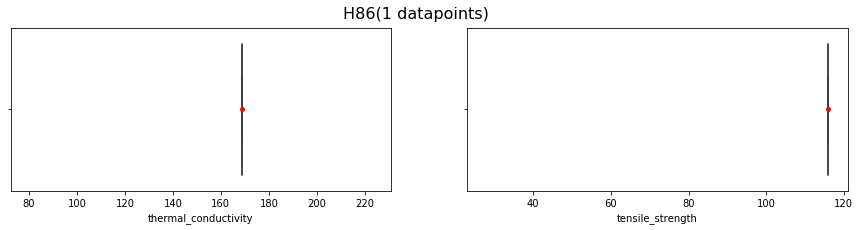

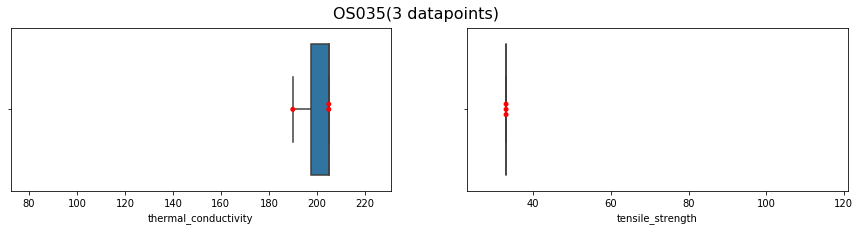

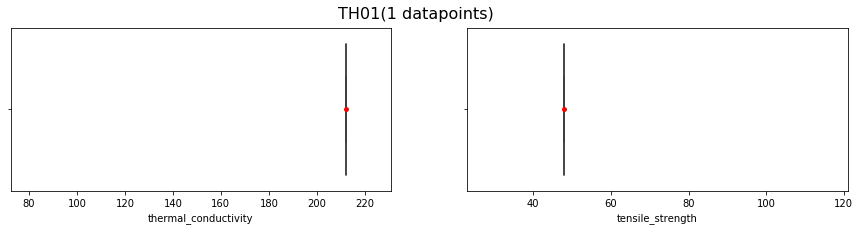

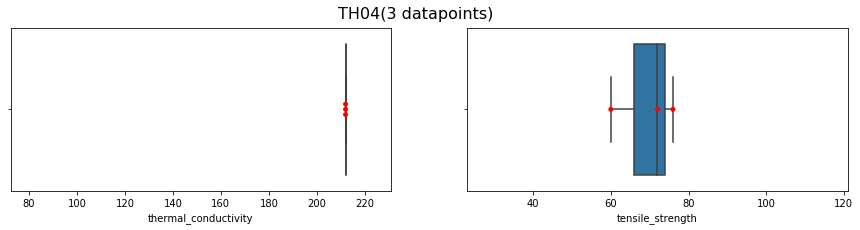

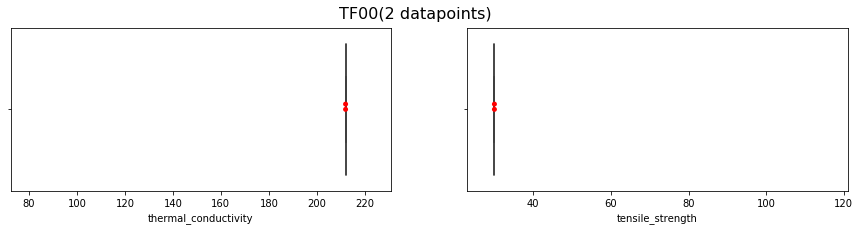

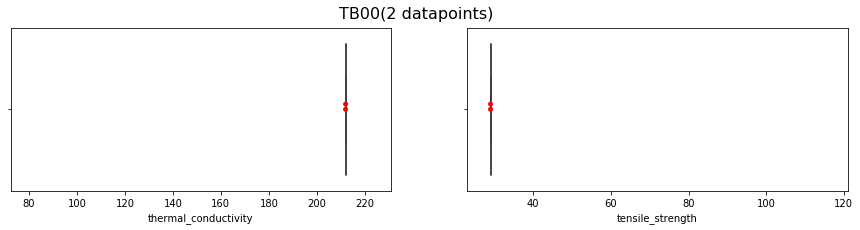

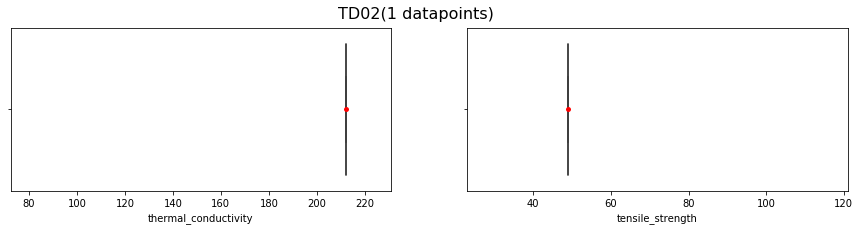

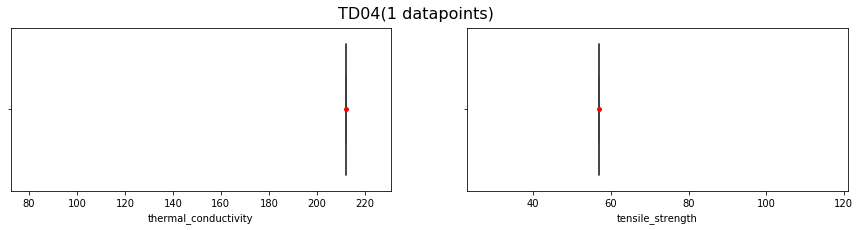

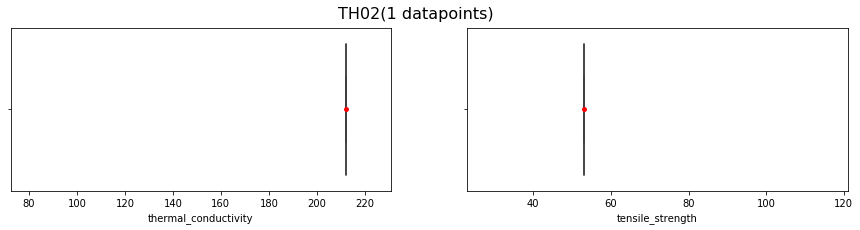

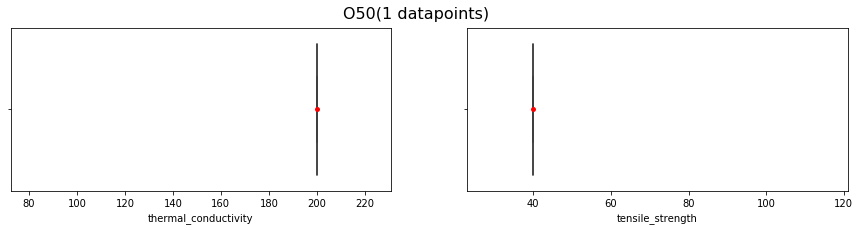

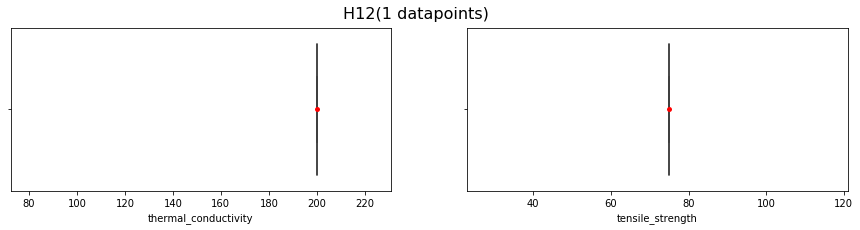

In [114]:
tc_data = data['thermal_conductivity']
ts_data = data['tensile_strength']
for f in data['temper_code'].unique():
    
    subset = data.loc[data['temper_code'] == f]
    tc_subset = subset['thermal_conductivity']
    ts_subset = subset['tensile_strength']
    
    fig, ax = plt.subplots(1, 2, figsize=(15,3))
    fig.suptitle(f + "({} datapoints)".format(len(subset)), fontsize=16)
    
    sns.boxplot(tc_subset, ax=ax[0])
    sns.swarmplot(tc_subset, ax=ax[0], color='red')
    ax[0].set_xlim([tc_data.min()-5, tc_data.max()+5])
    
    sns.boxplot(ts_subset, ax=ax[1])
    sns.swarmplot(ts_subset, ax=ax[1], color='red')
    ax[1].set_xlim([ts_data.min()-5, ts_data.max()+5])
    
    plt.show()